In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [56]:
cir = pd.read_csv('./datasets/cirrhosis.csv')

In [57]:
cir.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [58]:
cir.info

<bound method DataFrame.info of       ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL          Placebo  13918   F       N            Y   
..   ...     ...    ...              ...    ...  ..     ...          ...   
413  414     681      D              NaN  24472   F     NaN          NaN   
414  415    1103      C              NaN  14245   F     NaN          NaN   
415  416    1055      C              NaN  20819   F     NaN          NaN   
416  417     691      C              NaN  21185   F     NaN          NaN   
417  418     976      C              NaN  19358   F     NaN          NaN   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  Cop

## How Much Data Is Missing

In [59]:
cir.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [60]:
cir= cir.rename(columns=str.lower)

## Drop rows with missing data

In [61]:
drop_rows = cir.dropna()
print(drop_rows.shape, cir.shape)

(276, 20) (418, 20)


In [62]:
cirr = drop_rows

In [64]:
cirr.to_csv('./datasets/cirr_knn.csv', index=False)

## After dropping rows with missing data, we went from 418 down to 276 patients.  Now going to get value counts of each stage to get a sense of the distribution

In [42]:
cirr['stage'].value_counts()

3.0    111
4.0     94
2.0     59
1.0     12
Name: stage, dtype: int64

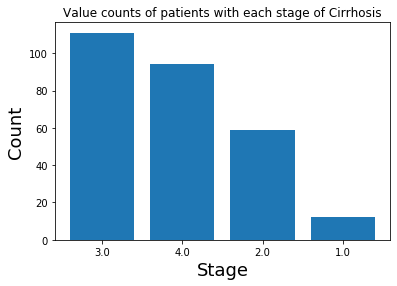

In [43]:
plt.bar(['3.0', '4.0', '2.0', '1.0'],
        cirr['stage'].value_counts())

# Add a title and show the plot.
plt.xlabel('Stage', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.title('Value counts of patients with each stage of Cirrhosis');

## Given that Stage 4 makes up about 35% of the data, I think that we could get a good machine learning model out of this.  Lets start with Logistic Regression

### Starting off by getting dummies for all the non-numeric columns in cirr

In [44]:
cirr = pd.get_dummies(cirr)

In [45]:
cirr.head()

,id,n_days,age,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage,status_C,status_CL,status_D,drug_D-penicillamine,drug_Placebo,sex_F,sex_M,ascites_N,ascites_Y,hepatomegaly_N,hepatomegaly_Y,spiders_N,spiders_Y,edema_N,edema_S,edema_Y
0,1,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1
1,2,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0
2,3,1012,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0
3,4,1925,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0
4,5,1504,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0


### Creating a target column and placing it as the first column in cirr.  Assigning it with dummy variables of the 'class' column.

In [46]:
cirr.insert(0, 'target', cirr['stage'])

In [47]:
cirr.head(2)

,target,id,n_days,age,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage,status_C,status_CL,status_D,drug_D-penicillamine,drug_Placebo,sex_F,sex_M,ascites_N,ascites_Y,hepatomegaly_N,hepatomegaly_Y,spiders_N,spiders_Y,edema_N,edema_S,edema_Y
0,4.0,1,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1
1,3.0,2,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0


## Assiging stages 1,2, and 3 as 0 and stage 4 as 1 for our target variable

In [48]:
cirr["target"].replace({1.0: 0, 2.0: 0, 3.0: 0, 4.0: 1}, inplace=True)

In [49]:
cirr.head(2)

,target,id,n_days,age,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage,status_C,status_CL,status_D,drug_D-penicillamine,drug_Placebo,sex_F,sex_M,ascites_N,ascites_Y,hepatomegaly_N,hepatomegaly_Y,spiders_N,spiders_Y,edema_N,edema_S,edema_Y
0,1.0,1,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1
1,0.0,2,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0


## Converting ['target'] from float to integer values

In [50]:
cirr['target'] = cirr['target'].astype(int)

In [51]:
cirr.head(2)

,target,id,n_days,age,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage,status_C,status_CL,status_D,drug_D-penicillamine,drug_Placebo,sex_F,sex_M,ascites_N,ascites_Y,hepatomegaly_N,hepatomegaly_Y,spiders_N,spiders_Y,edema_N,edema_S,edema_Y
0,1,1,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1
1,0,2,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0


## Now that the target column is in place, will drop the 'stage' column so that it is not included as a feature in the model.

In [52]:
cirr.drop(['stage'], axis=1, inplace=True)

In [53]:
cirr.head()

,target,id,n_days,age,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,status_C,status_CL,status_D,drug_D-penicillamine,drug_Placebo,sex_F,sex_M,ascites_N,ascites_Y,hepatomegaly_N,hepatomegaly_Y,spiders_N,spiders_Y,edema_N,edema_S,edema_Y
0,1,1,400,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1
1,0,2,4500,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0
2,1,3,1012,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0
3,1,4,1925,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0
4,0,5,1504,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0


In [65]:
cirr.to_csv('./datasets/cirr_clean.csv', index=False)

## It looks like the presence of hepatomegaly and ascites are the 2 most correlated variables to determining the stage of liver disease.  In addition, labs such as albumin and bilirubin are quite significant.

In [25]:
features = ['hepatomegaly_Y', 'hepatomegaly_N', 'ascites_Y', 'ascites_N', 'albumin', 'prothrombin', 
            'spiders_Y', 'spiders_N', 'edema_Y', 'edema_N', 'copper', 'platelets', 'bilirubin', 'age']

# Define y and X.
y = cirr[['target']]
X = cirr[features]

# Import train_test_split.
from sklearn.model_selection import train_test_split
# Create training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 42)

In [26]:
ss = StandardScaler()
ss.fit(X_train) # ONLY fit to X_train, NEVER to X_test

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [27]:
# Step 1: Instantiate our model.
logreg = LogisticRegression(solver = 'liblinear', class_weight= {1: 0.1})

# Step 2: Fit our model.
logreg.fit(X_train_sc, y_train)

print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient: {logreg.coef_}')

Logistic Regression Intercept: [-2.30829294]
Logistic Regression Coefficient: [[ 0.3191071  -0.3191071   0.71020614 -0.71020614 -0.33133885  0.13530003
   0.16661104 -0.16661104 -0.21010094 -0.03033622  0.33337928 -0.1478768
  -0.10701121  0.33523945]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
# Step 4: Evaluate model.
logreg.score(X_test_sc, y_test)

0.7934782608695652

### My best test score has 79% accuracy.  I adjusted the threshold via the class weight parameter to 0.1 to minimize false negatives and thereby maximize sensitivity.
***
### Creating a confusion matrix to evaluate Sensitivity and Specificity

In [29]:
# Generate predictions.
preds = logreg.predict(X_test_sc)

In [30]:
def nice_conmat(y_test, preds, classes):
    conmat = confusion_matrix(y_test, preds)
    return pd.DataFrame(conmat, columns=['Predicted ' +class_ for class_ in classes], \
                index=['Actually '+ class_ for class_ in classes])
nice_conmat(y_test, preds, ['stages 1-3', 'stage 4'])

,Predicted stages 1-3,Predicted stage 4
Actually stages 1-3,65,0
Actually stage 4,19,8


In [31]:
# Save TN/FP/FN/TP values.
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

## Sensitivity

In [32]:
sens = tp / (tp + fn)
print(f'Sensitivity: {round(sens,4)}')

Sensitivity: 0.2963


## Specificity

In [33]:
spec = tn / (tn + fp)
print(f'Specificity: {round(spec,4)}')

Specificity: 1.0
